# Rain in Australia

## 1. Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

rain = pd.read_csv('./2008-2017.csv')
rain2023 = pd.read_csv(('./2022-2023.csv'))

rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall Category
0,1/01/2009,Moree,16.4,38.7,0.0,12.2,9.3,NW,54,N,...,28,27,11.0,1005.5,1003.3,6.0,8.0,28.9,37.4,No Rain
1,2/01/2009,Moree,22.3,30.3,0.0,11.2,3.0,NNE,30,NNE,...,15,68,40.0,1009.5,1009.0,6.0,7.0,25.2,29.4,No Rain
2,3/01/2009,Moree,21.2,33.3,0.0,6.2,11.7,ENE,46,ENE,...,22,57,31.0,1014.9,1012.2,6.0,5.0,24.5,32.7,No Rain
3,4/01/2009,Moree,16.4,33.5,0.0,11.2,13.3,ENE,39,NE,...,20,51,28.0,1016.9,1012.2,1.0,3.0,22.9,31.9,No Rain
4,5/01/2009,Moree,19.2,34.5,0.0,12.6,13.4,SE,35,ENE,...,11,44,22.0,1015.1,1010.6,1.0,6.0,24.2,32.9,No Rain


In [2]:
rain.shape

(60926, 22)

In [3]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60926 entries, 0 to 60925
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               60926 non-null  object 
 1   Location           60926 non-null  object 
 2   MinTemp            60926 non-null  float64
 3   MaxTemp            60926 non-null  float64
 4   Rainfall           60926 non-null  float64
 5   Evaporation        60926 non-null  float64
 6   Sunshine           60926 non-null  float64
 7   WindGustDir        56207 non-null  object 
 8   WindGustSpeed      60926 non-null  int64  
 9   WindDir9am         59029 non-null  object 
 10  WindDir3pm         59852 non-null  object 
 11  WindSpeed9am       60926 non-null  int64  
 12  WindSpeed3pm       60926 non-null  int64  
 13  Humidity9am        60926 non-null  int64  
 14  Humidity3pm        60230 non-null  float64
 15  Pressure9am        60926 non-null  float64
 16  Pressure3pm        609

In [4]:
rain['Date'] = pd.to_datetime(rain['Date'],dayfirst=True)
rain2023['Date'] = pd.to_datetime(rain2023['Date'],dayfirst=True)
rain.dtypes

Date                 datetime64[ns]
Location                     object
MinTemp                     float64
MaxTemp                     float64
Rainfall                    float64
Evaporation                 float64
Sunshine                    float64
WindGustDir                  object
WindGustSpeed                 int64
WindDir9am                   object
WindDir3pm                   object
WindSpeed9am                  int64
WindSpeed3pm                  int64
Humidity9am                   int64
Humidity3pm                 float64
Pressure9am                 float64
Pressure3pm                 float64
Cloud9am                    float64
Cloud3pm                    float64
Temp9am                     float64
Temp3pm                     float64
Rainfall Category            object
dtype: object

In [5]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,60926.000000,60926.000000,60926.000000,60926.000000,60926.000000,60926.000000,60926.000000,60926.000000,60926.000000,60230.000000,60926.000000,60925.000000,60922.000000,60922.000000,60926.000000,60230.000000
mean,13.652541,24.145600,2.452181,5.172847,7.020082,37.144405,15.146604,19.149772,66.579638,50.784144,1015.797087,1013.418423,4.277018,4.207232,18.288218,22.707440
std,6.381470,6.922899,9.063870,3.799605,4.202002,16.522779,8.699603,8.705009,18.774168,20.479847,40.928267,39.995582,2.852052,2.749141,6.546936,6.772339
min,-5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.000000
25%,8.900000,18.700000,0.000000,2.400000,3.500000,30.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.200000,1.000000,1.000000,13.200000,17.500000
50%,13.400000,23.700000,0.000000,4.600000,8.000000,37.000000,15.000000,19.000000,68.000000,52.000000,1017.300000,1014.800000,5.000000,5.000000,17.900000,22.300000
75%,18.500000,29.600000,0.800000,7.200000,10.500000,46.000000,20.000000,24.000000,80.000000,65.000000,1021.900000,1019.500000,7.000000,7.000000,23.300000,27.900000
max,31.900000,47.300000,367.600000,74.800000,14.500000,135.000000,69.000000,76.000000,100.000000,100.000000,1040.900000,1038.200000,9.000000,8.000000,39.400000,46.700000


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>],
       [<Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>],
       [<Axes: title={'center': 'Temp3pm'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

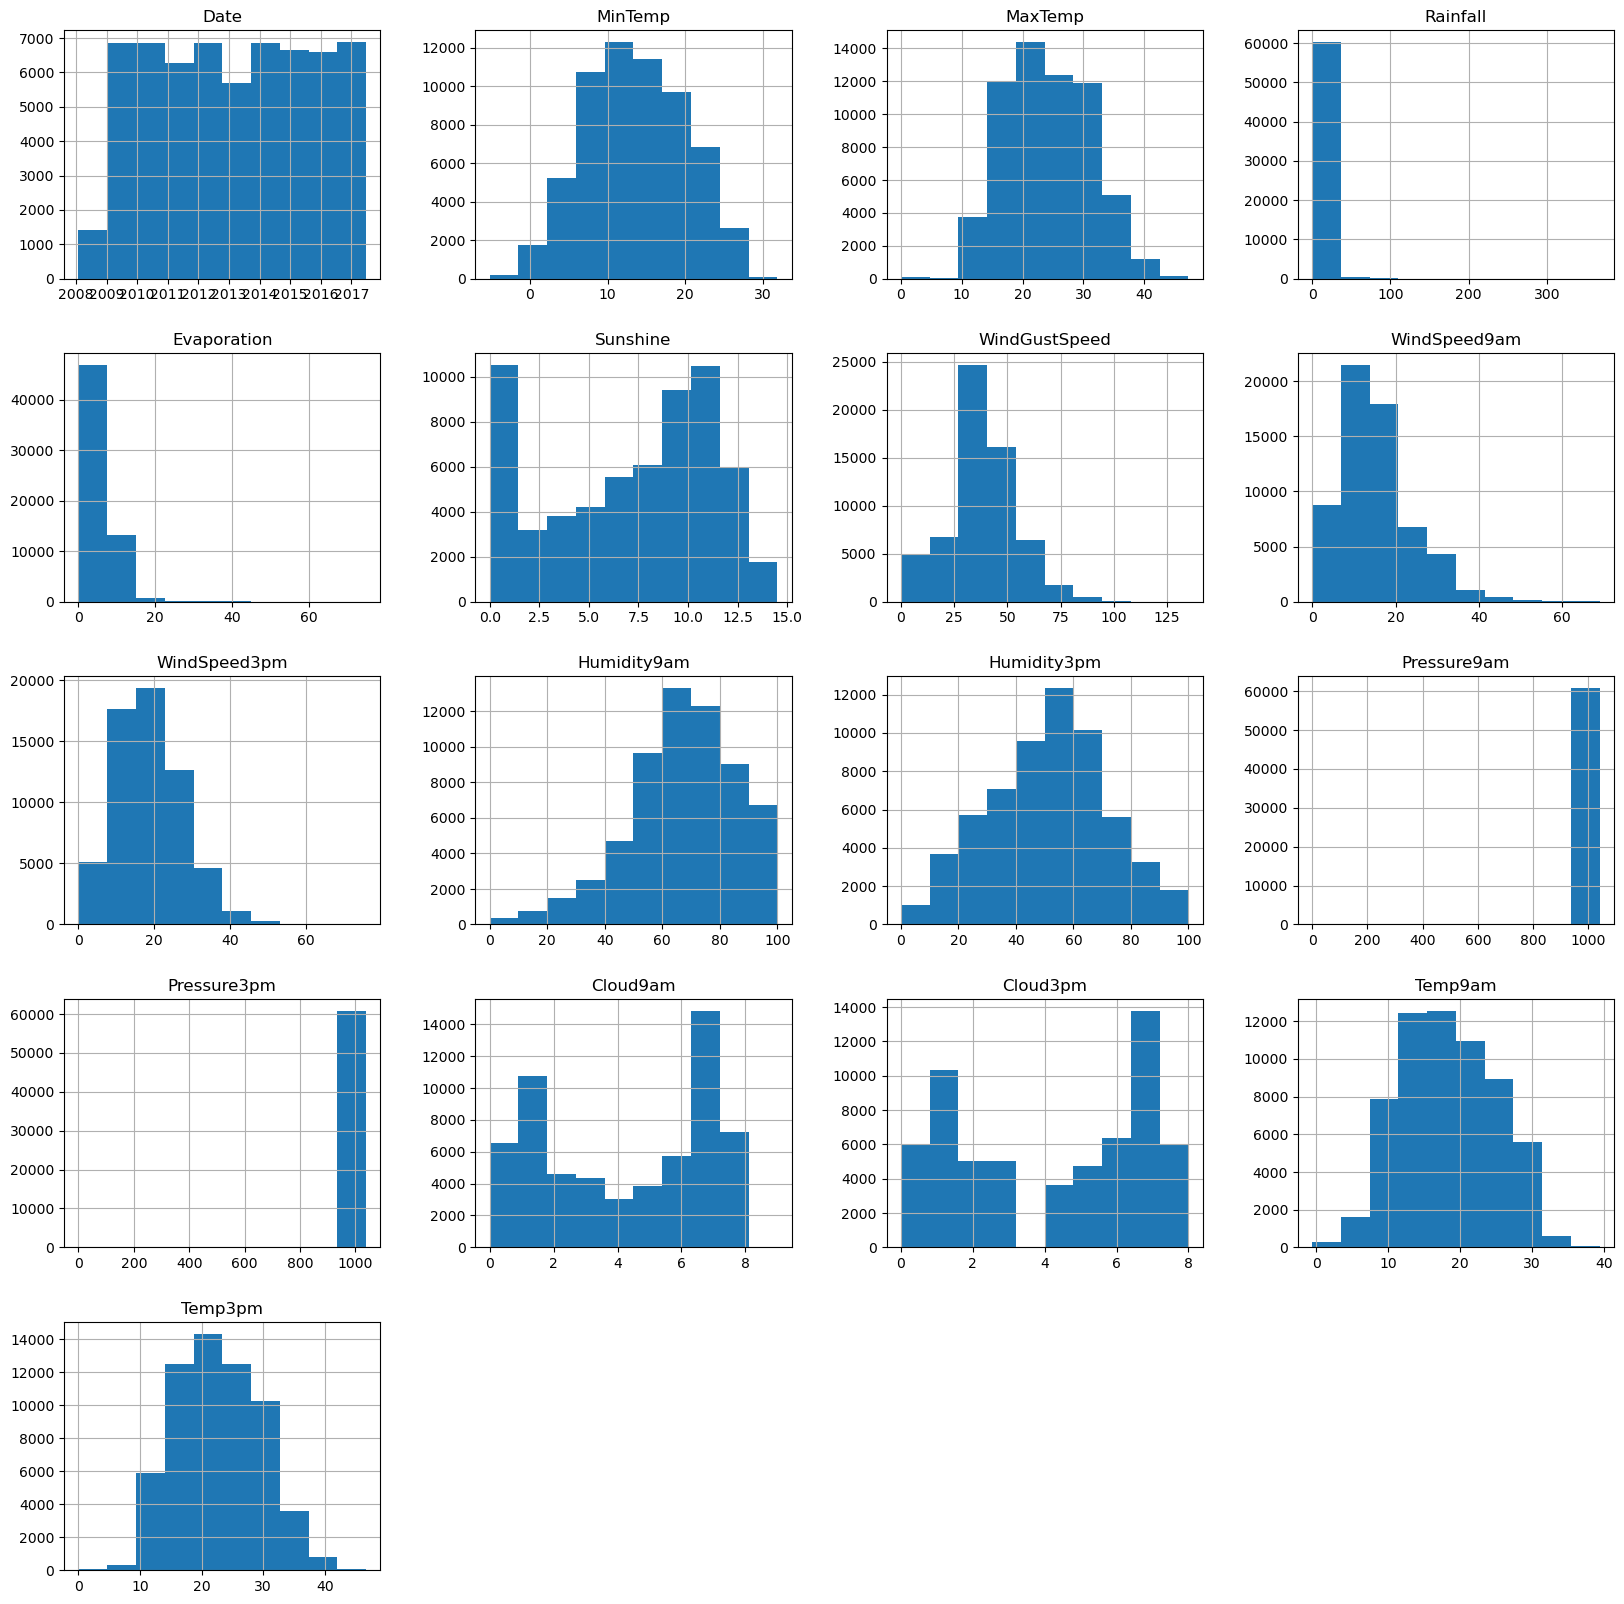

In [6]:
import numpy as np
import matplotlib.pyplot as plt
rain.hist(figsize=(20,20))


# No extreme outlier was found.

<Axes: >

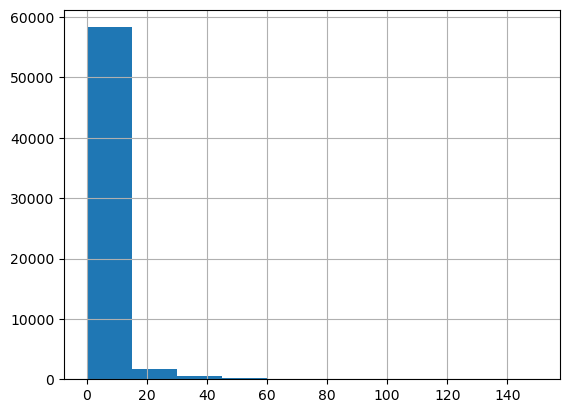

In [7]:
rain['Rainfall'].hist(range=(0,150))

In [8]:
corr_matrix = rain.corr()
corr_matrix

C:\Users\Dylan\AppData\Local\Temp\ipykernel_26508\1304242283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = rain.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.722805,0.117553,0.451275,0.051162,0.124200,0.134735,0.165544,-0.150454,0.092444,-0.082638,-0.089573,0.097020,0.052809,0.896470,0.702844
MaxTemp,0.722805,1.000000,-0.046379,0.581469,0.380520,0.131559,0.015849,0.047645,-0.489790,-0.451394,-0.049520,-0.066688,-0.275232,-0.230742,0.879090,0.974924
Rainfall,0.117553,-0.046379,1.000000,-0.095832,-0.192891,0.088516,0.060206,0.047030,0.234177,0.253434,-0.028720,-0.021708,0.192681,0.169870,0.029180,-0.049044
Evaporation,0.451275,0.581469,-0.095832,1.000000,0.358193,0.189002,0.163548,0.137646,-0.498596,-0.366839,-0.034736,-0.040332,-0.177554,-0.165096,0.547693,0.565426
Sunshine,0.051162,0.380520,-0.192891,0.358193,1.000000,0.012844,-0.029730,0.062730,-0.404388,-0.514194,0.017804,0.012423,-0.528698,-0.511712,0.229256,0.390266
WindGustSpeed,0.124200,0.131559,0.088516,0.189002,0.012844,1.000000,0.498459,0.557447,-0.181545,-0.100746,-0.021782,-0.013582,0.029724,0.112490,0.131441,0.090471
WindSpeed9am,0.134735,0.015849,0.060206,0.163548,-0.029730,0.498459,1.000000,0.493838,-0.214205,-0.044584,-0.024226,-0.021507,0.046801,0.074368,0.085651,0.006909
WindSpeed3pm,0.165544,0.047645,0.047030,0.137646,0.062730,0.557447,0.493838,1.000000,-0.108752,0.042641,-0.047468,-0.012409,0.056325,0.072083,0.145216,0.011998
Humidity9am,-0.150454,-0.489790,0.234177,-0.498596,-0.404388,-0.181545,-0.214205,-0.108752,1.000000,0.673004,0.041244,0.024659,0.414360,0.313526,-0.396145,-0.483519
Humidity3pm,0.092444,-0.451394,0.253434,-0.366839,-0.514194,-0.100746,-0.044584,0.042641,0.673004,1.000000,-0.024967,0.034154,0.496657,0.482705,-0.150612,-0.490680


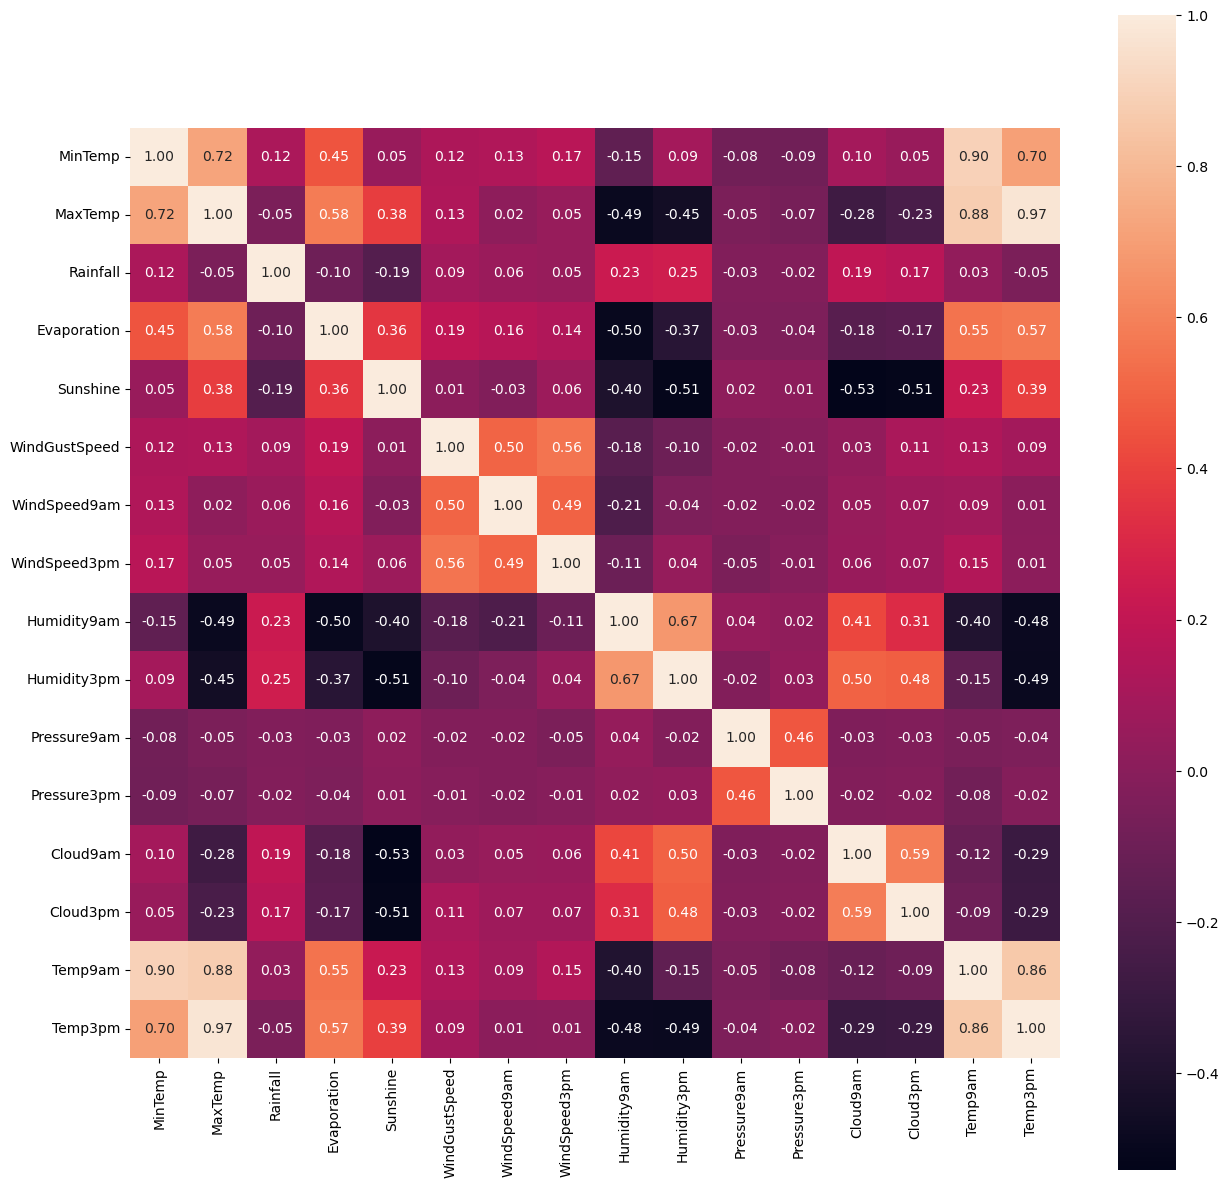

In [9]:
plt.figure(figsize=(15,15))
sn.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')   
plt.show()

In [10]:
# Create new columns Temp, WindSpeed, Humidity and Month for modeling
rain['Temp'] = (rain['MinTemp']+rain['MaxTemp'])/2
rain2023['Temp'] = (rain2023['MinTemp']+rain2023['MaxTemp'])/2
rain['WindSpeed'] = (rain['WindSpeed9am']+rain['WindSpeed3pm'])/2
rain2023['WindSpeed'] = (rain2023['WindSpeed9am']+rain2023['WindSpeed3pm'])/2
rain['Humidity'] = (rain['Humidity9am']+rain['Humidity3pm'])/2
rain2023['Humidity'] = (rain2023['Humidity9am']+rain2023['Humidity3pm'])/2

rain2023.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall Category,Temp,WindSpeed,Humidity
0,2022-06-01,Sydney,8.5,15.0,0.0,4.4,9.3,WSW,76,WNW,...,1005.9,1007.7,1.0,1.0,11.0,14.7,No Rain,11.75,37.0,44.5
1,2022-06-02,Sydney,8.1,18.1,0.0,5.8,7.1,W,35,W,...,1020.7,1018.6,7.0,5.0,10.2,17.8,No Rain,13.10,17.5,62.0
2,2022-06-03,Sydney,7.5,16.5,0.0,2.0,1.3,N,35,W,...,1017.7,1012.0,7.0,8.0,9.9,14.6,No Rain,12.00,16.0,74.5
3,2022-06-04,Sydney,8.7,18.4,0.4,1.4,9.4,W,44,W,...,1012.2,1011.1,1.0,1.0,11.4,18.3,Drizzle,13.55,25.0,59.0
4,2022-06-05,Sydney,10.3,17.7,0.0,3.8,4.9,NNW,52,N,...,1012.6,1007.5,6.0,7.0,13.0,15.9,No Rain,14.00,30.5,60.5


In [11]:
rain['Month']=rain['Date'].dt.month
rain2023['Month']=rain2023['Date'].dt.month
rain2023.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall Category,Temp,WindSpeed,Humidity,Month
0,2022-06-01,Sydney,8.5,15.0,0.0,4.4,9.3,WSW,76,WNW,...,1007.7,1.0,1.0,11.0,14.7,No Rain,11.75,37.0,44.5,6
1,2022-06-02,Sydney,8.1,18.1,0.0,5.8,7.1,W,35,W,...,1018.6,7.0,5.0,10.2,17.8,No Rain,13.10,17.5,62.0,6
2,2022-06-03,Sydney,7.5,16.5,0.0,2.0,1.3,N,35,W,...,1012.0,7.0,8.0,9.9,14.6,No Rain,12.00,16.0,74.5,6
3,2022-06-04,Sydney,8.7,18.4,0.4,1.4,9.4,W,44,W,...,1011.1,1.0,1.0,11.4,18.3,Drizzle,13.55,25.0,59.0,6
4,2022-06-05,Sydney,10.3,17.7,0.0,3.8,4.9,NNW,52,N,...,1007.5,6.0,7.0,13.0,15.9,No Rain,14.00,30.5,60.5,6


## 2. KNN Modelling

#### 1. Import sklearn module

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### 2. Convert categories to dummies

In [13]:
# Column Location and Rain Category are converted to dummies

rain['Location_dum'] = rain.Location.map({'Albany':0, 'AliceSprings':1, 'Brisbane':2,'Cairns':3,'Darwin':4,'Melbourne':5,
                                          'MelbourneAirport':6,'Mildura':7,'Moree':8,'MountGambier':9,'NorfolkIsland':10,
                                          'Nuriootpa':11,'Perth':12,'PerthAirport':13,'Portland':14,'Sydney':15,
                                          'SydneyAirport':16,'Townsville':17,'WaggaWagga':18,'Watsonia':19})
rain['RainCat_dum'] = rain['Rainfall Category'].map({'No Rain':0,'Drizzle':1,'Little Rain':2,'Moderate Rain':3,'Heavy Rain':4})
rain2023['Location_dum'] = rain2023.Location.map({'Albany':0, 'AliceSprings':1, 'Brisbane':2,'Cairns':3,'Darwin':4,'Melbourne':5,
                                          'MelbourneAirport':6,'Mildura':7,'Moree':8,'MountGambier':9,'NorfolkIsland':10,
                                          'Nuriootpa':11,'Perth':12,'PerthAirport':13,'Portland':14,'Sydney':15,
                                          'SydneyAirport':16,'Townsville':17,'WaggaWagga':18,'Watsonia':19})
rain2023['RainCat_dum'] = rain2023['Rainfall Category'].map({'No Rain':0,'Drizzle':1,'Little Rain':2,'Moderate Rain':3,'Heavy Rain':4})


In [14]:
# Check if the dummies are mapped correctly
rain['RainCat_dum'].value_counts()
rain['Location_dum'].value_counts()

15    3344
2     3193
12    3193
4     3193
3     3040
17    3040
9     3040
0     3040
1     3040
18    3009
6     3009
7     3009
14    3009
19    3009
10    3009
11    3009
13    3009
16    3009
8     3009
5     2713
Name: Location_dum, dtype: int64

In [15]:
# Check Null for Month, Location_dum, Temp, WindSpeed, Humidity and RainCat_dum
rain2023.isna().sum()
rain.isna().sum()

Date                    0
Location                0
MinTemp                 0
MaxTemp                 0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir          4719
WindGustSpeed           0
WindDir9am           1897
WindDir3pm           1074
WindSpeed9am            0
WindSpeed3pm            0
Humidity9am             0
Humidity3pm           696
Pressure9am             0
Pressure3pm             1
Cloud9am                4
Cloud3pm                4
Temp9am                 0
Temp3pm               696
Rainfall Category       0
Temp                    0
WindSpeed               0
Humidity              696
Month                   0
Location_dum            0
RainCat_dum             0
dtype: int64

In [16]:
# Remove missing values for Humidity
rain = rain.loc[rain["Humidity"].notnull()]
rain.isna().sum()

Date                    0
Location                0
MinTemp                 0
MaxTemp                 0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir          4024
WindGustSpeed           0
WindDir9am           1841
WindDir3pm            379
WindSpeed9am            0
WindSpeed3pm            0
Humidity9am             0
Humidity3pm             0
Pressure9am             0
Pressure3pm             0
Cloud9am                4
Cloud3pm                3
Temp9am                 0
Temp3pm                 0
Rainfall Category       0
Temp                    0
WindSpeed               0
Humidity                0
Month                   0
Location_dum            0
RainCat_dum             0
dtype: int64

#### 3. Create `X_train`, `X_test`, `y_train` and `y_test` variables

In [17]:
# Use 2008-2017 data as the training data set, 2022-2023 data as the testing data set
X_train = rain[['Month','Location_dum','Temp','WindSpeed','Humidity']]
y_train = rain['RainCat_dum']

X_test = rain2023[['Month','Location_dum','Temp','WindSpeed','Humidity']]
y_test = rain2023['RainCat_dum']

#### 4. Train a classifier on the training data

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6405479452054794


In [22]:
# Null accruacy is tested where Rain Category is 'No Rain' and RainCat_dum is 0
Null_accruacy = len(rain2023[rain2023['RainCat_dum']==0])/len(rain2023['RainCat_dum'])
Null_accruacy

0.6153424657534247

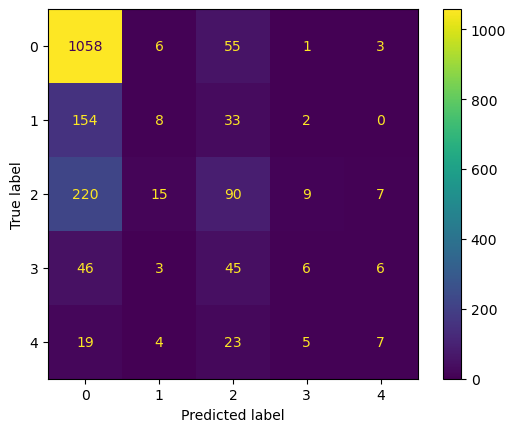

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

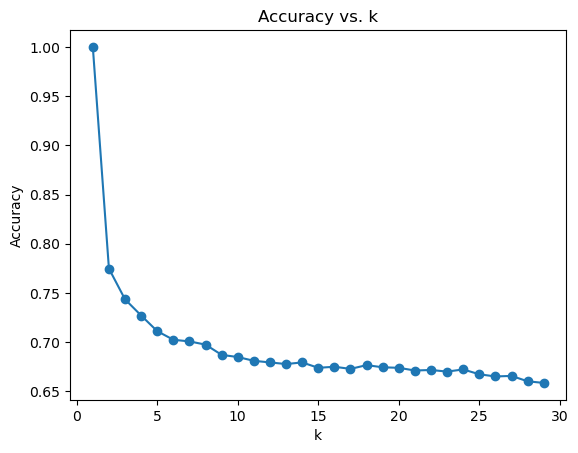

In [43]:
# Finding the best k value
from sklearn.metrics import accuracy_score

k_values = range(1, 30)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_test, y_test)
    y_pred_class = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_class))

# Plot the accuracy scores against k
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

In [45]:
# Choose k = 5 using elbow method
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6180821917808219


In [ ]:
#Test Accuracy is higher than Null Accuracy